# Problem Statement
Perform Facial Recognition with Deep Learning in Keras Using CNN

### DESCRIPTION

Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:
    1. Convolutional Layer
    2. Pooling Layer
    3. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

# Loading Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

faces_raw = np.load('./ORL_faces.npz')
faces_raw.files

['testY', 'testX', 'trainX', 'trainY']

In [2]:
X_train = faces_raw['trainX']
X_test = faces_raw['testX']
Y_train = faces_raw['trainY']
Y_test = faces_raw['testY']

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((240, 10304), (160, 10304), (240,), (160,))

In [3]:
original_img_width, original_img_height = 112, 92
img_width, img_height = 112, 112

In [4]:
Y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [5]:
X_train

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

# Normalizing The Train & Test Images

In [6]:
X_train = X_train / 255
X_test = X_test / 255

X_train

array([[0.18823529, 0.19215686, 0.17647059, ..., 0.18431373, 0.18039216,
        0.18039216],
       [0.23529412, 0.23529412, 0.24313725, ..., 0.1254902 , 0.13333333,
        0.13333333],
       [0.15294118, 0.17254902, 0.20784314, ..., 0.11372549, 0.10196078,
        0.11372549],
       ...,
       [0.44705882, 0.45882353, 0.44705882, ..., 0.38431373, 0.37647059,
        0.38431373],
       [0.41176471, 0.41176471, 0.41960784, ..., 0.21176471, 0.18431373,
        0.16078431],
       [0.45490196, 0.44705882, 0.45882353, ..., 0.37254902, 0.39215686,
        0.39607843]])

# Reshaping the X_train & X_test

In [7]:
X_train = X_train.reshape(X_train.shape[0], original_img_width, original_img_height, 1)
X_test = X_test.reshape(X_test.shape[0], original_img_width, original_img_height, 1)

# Resizing the image 

In [8]:
X_train_resized = np.zeros((X_train.shape[0], img_width, img_height, 1))

X_test_resized = np.zeros((X_test.shape[0], img_width, img_height, 1))

# Resizing train images into 112x112

for i, imgs in enumerate(X_train):
    for j, img in enumerate(imgs):
        X_train_resized[i][j][:92] = img
print(X_train_resized.shape)

# Resizing test images into 112x112

for i, imgs in enumerate(X_test):
    for j, img in enumerate(imgs):
        X_test_resized[i][j][:92] = img
print(X_test_resized.shape)

(240, 112, 112, 1)
(160, 112, 112, 1)


# Visualizing The Reshaped Images

In [9]:
!pip install matplotlib

     |████████████████████████████████| 10.3 MB 16.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 74.4 MB/s eta 0:00:01


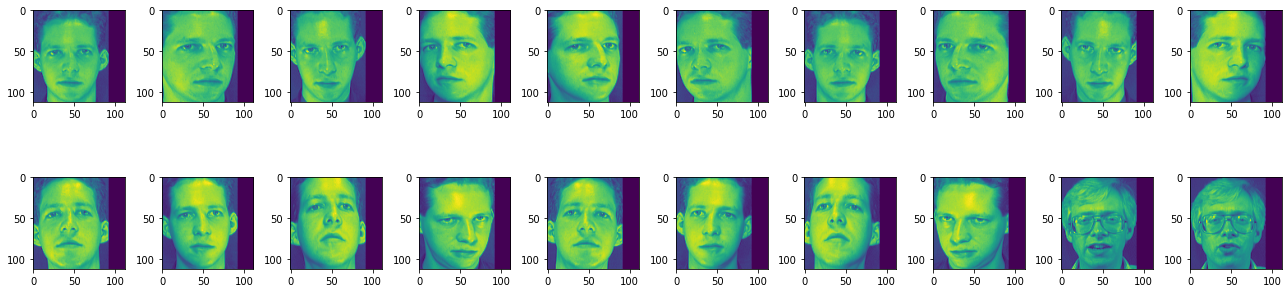

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
# ploting 10 train and 10 test images
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train_resized[i])
    
    plt.subplot(2, 10, i+1+10)
    plt.imshow(X_test_resized[i])
    
    plt.tight_layout()

plt.show()

# Performing Image Augmentation

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_img_gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False
)

test_img_gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False
)

# train test split

In [12]:
i=0
trainX = np.empty((0,img_width, img_height, 1), float)
trainY = np.empty((0,1), dtype='uint8')
bs = 32

for image_batch, label in train_img_gen.flow(X_train_resized, Y_train, batch_size=bs, seed=21):
    i += 1
    for j, image in enumerate(image_batch):
        trainX = np.append(trainX, image.reshape(1, img_width, img_height, 1), axis=0)
        trainY = np.append(trainY, label[j].reshape(1,1))
    if i == 50:
        break
trainX.shape, trainY.shape

((1504, 112, 112, 1), (1504,))

In [13]:
i=0
testX = np.empty((0,img_width, img_height, 1), float)
testY = np.empty((0,1), dtype='uint8')
bs = 32

for image_batch, label in test_img_gen.flow(X_test_resized, Y_test, batch_size=bs, seed=21):
    i += 1
    for j, image in enumerate(image_batch):
        testX = np.append(testX, image.reshape(1, img_width, img_height, 1), axis=0)
        testY = np.append(testY, label[j].reshape(1,1))
    if i == 15:
        break
testX.shape, testY.shape

((480, 112, 112, 1), (480,))

## Visualizing the augmented images

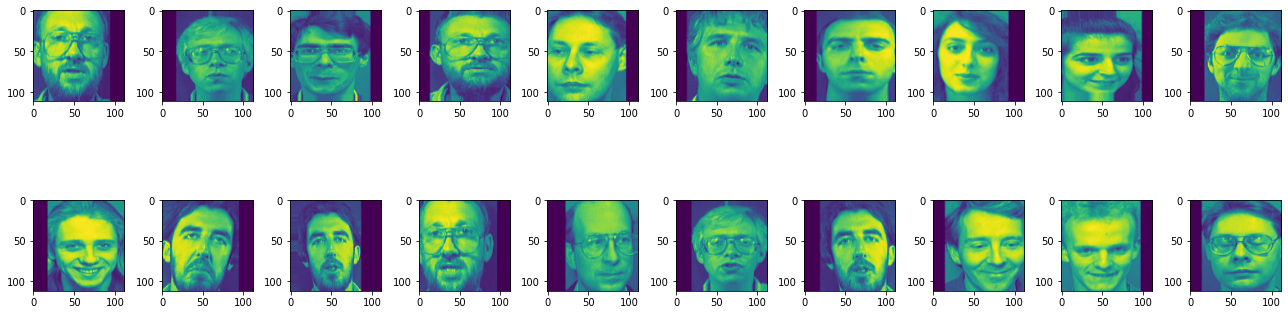

In [14]:
i = 0

plt.figure(figsize=(18,6))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(trainX[i])
    
    plt.subplot(2, 10, i+1+10)
    plt.imshow(testX[i])
        
plt.tight_layout()
plt.show()

# Creating CNN Model

In [20]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_accuracy",
    patience=150,
)

input = keras.Input(shape=(img_width, img_height, 1))

# Convalutional Layers

conv_layers = layers.Conv2D(128, (3,3), padding='same', activation='relu')(input)
conv_layers = layers.BatchNormalization()(conv_layers)
conv_layers = layers.MaxPooling2D((2,2), padding='same')(conv_layers)


# Fully Connected Layers
conected_layers = layers.Flatten()(conv_layers)

conected_layers = layers.Dense(80, activation='relu')(conected_layers)
conected_layers = layers.BatchNormalization()(conected_layers)
conected_layers = layers.Dropout(0.2)(conected_layers)

conected_layers = layers.Dense(40, activation='softmax')(conected_layers)

model = Model(input, conected_layers)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 112, 112, 1)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     1280      
_________________________________________________________________
batch_normalization_5 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 80)                32112720  
_________________________________________________________________
batch_normalization_6 (Batch (None, 80)               

In [21]:
history = model.fit(
    trainX, 
    trainY,
    batch_size=32,
    epochs=1000,
    steps_per_epoch=5,
    validation_data=(testX, testY),
    callbacks=[callback]
)

Epoch 1/1000
1/5 [=====>........................] - ETA: 0s - loss: 4.3671 - accuracy: 0.0625WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0035s vs `on_train_batch_end` time: 0.0373s). Check your callbacks.


5/5 [==============================] - ETA: 0s - loss: 3.8574 - accuracy: 0.1063WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0022s vs `on_test_batch_end` time: 0.0104s). Check your callbacks.


5/5 [==============================] - 0s 98ms/step - loss: 3.8574 - accuracy: 0.1063 - val_loss: 4.8899 - val_accuracy: 0.0521
Epoch 2/1000
5/5 [==============================] - 0s 68ms/step - loss: 3.5758 - accuracy: 0.1750 - val_loss: 4.3519 - val_accuracy: 0.0479
Epoch 3/1000
5/5 [==============================] - 0s 68ms/step - loss: 3.5847 - accuracy: 0.1187 - val_loss: 4.1413 - val_accuracy: 0.0437
Epoch 4/1000
5/5 [==============================] - 0s 68ms/step - loss: 3.1583 - accuracy: 0.2937 - val_loss: 4.0145 - val_accuracy: 0.0458
Epoch 5/1000
5/5 [==============================] - 0s 68ms/step - loss: 3.0247 - accuracy: 0.2688 - val_loss: 3.8809 - val_accuracy: 0.0437
Epoch 6/1000
5/5 [==============================] - 0s 68ms/step - loss: 3.0401 - accuracy: 0.2313 - val_loss: 3.7531 - val_accuracy: 0.0437
Epoch 7/1000
5/5 [==============================] - 0s 68ms/step - loss: 2.7401 - accuracy: 0.2812 - val_loss: 3.6588 - val_accuracy: 0.0500
Epoch 8/1000
5/5 [========

# Model Evaluation

## Accuracy Plot

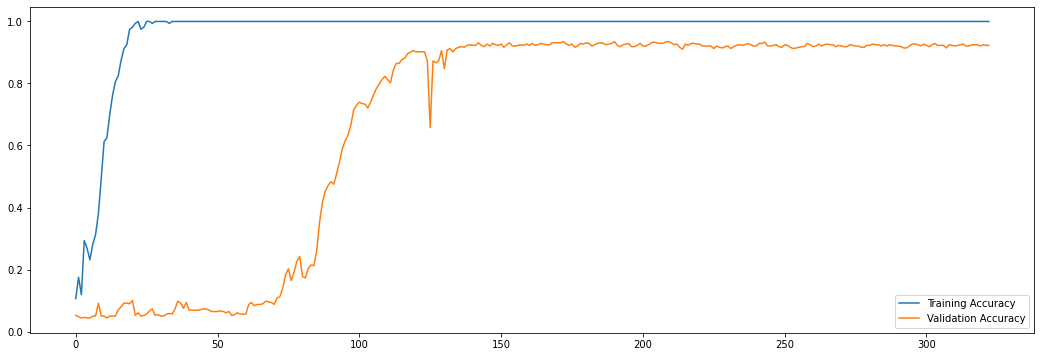

In [22]:
plt.figure(figsize=(18,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Loss Plot

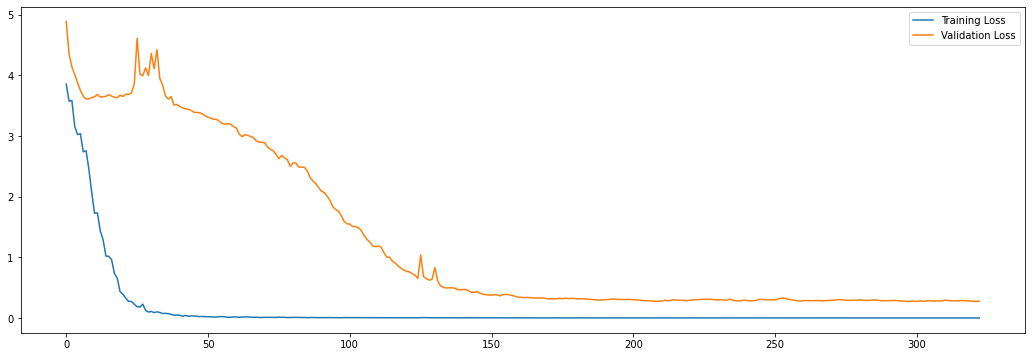

In [23]:
plt.figure(figsize=(18,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## Model Scores

In [28]:
scores = model.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

accuracy: 100.00%
loss: 0.02%


## Serialize model to JSON

In [29]:
model_json = model.to_json()
with open("face_recognition_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Testing saved model

In [31]:
from tensorflow.keras.models import model_from_json

json_file = open('face_recognition_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


# Evaluate loaded model on test data

In [35]:
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(trainX, trainY, verbose=0)
print("Training Scores")
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print("="*50)
print("Validation Scores")
score = loaded_model.evaluate(testX, testY, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Training Scores
accuracy: 100.00%
Validation Scores
accuracy: 92.29%
